# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [5]:

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5702 files belonging to 3 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1426 files belonging to 3 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [12]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [13]:

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

### Compiling and Training Phase

In [25]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 381ms/step - accuracy: 0.5696 - loss: 0.9531 - val_accuracy: 0.9229 - val_loss: 0.1879
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 360ms/step - accuracy: 0.9220 - loss: 0.1991 - val_accuracy: 0.9684 - val_loss: 0.0844
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 362ms/step - accuracy: 0.9496 - loss: 0.1328 - val_accuracy: 0.9600 - val_loss: 0.1505
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 363ms/step - accuracy: 0.9714 - loss: 0.0862 - val_accuracy: 0.9867 - val_loss: 0.0471
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 378ms/step - accuracy: 0.9764 - loss: 0.0704 - val_accuracy: 0.9881 - val_loss: 0.0401
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 413ms/step - accuracy: 0.9861 - loss: 0.0400 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 418ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9881 - val_loss: 0.0269
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 70s 389ms/step - accuracy: 0.9839 - loss: 0

## Evaluating Model

In [28]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.9966 - loss: 0.0086
Training accuracy: 0.9980708360671997


In [29]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9860 - loss: 0.0320
Validation accuracy: 0.9922860860824585


### Saving Model

In [30]:
cnn.save('trained_plant_disease_model.keras')

In [31]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7229042649269104,
  0.9359873533248901,
  0.9510697722434998,
  0.9752718210220337,
  0.9722903966903687,
  0.9842160940170288,
  0.9893019795417786,
  0.9866713285446167,
  0.9891266226768494,
  0.9917572736740112],
 'loss': [0.6082642674446106,
  0.16421836614608765,
  0.13250835239887238,
  0.07030895352363586,
  0.08043091744184494,
  0.04183024913072586,
  0.034759536385536194,
  0.03436552360653877,
  0.03056306764483452,
  0.024627240374684334],
 'val_accuracy': [0.9228611588478088,
  0.9684432148933411,
  0.9600280523300171,
  0.986676037311554,
  0.9880785346031189,
  0.9873772859573364,
  0.9880785346031189,
  0.9943898916244507,
  0.9908835887908936,
  0.9922860860824585],
 'val_loss': [0.18792623281478882,
  0.08439341932535172,
  0.15048229694366455,
  0.047097984701395035,
  0.04010665416717529,
  0.03755839541554451,
  0.026853403076529503,
  0.023198995739221573,
  0.0265919528901577,
  0.021884921938180923]}

In [32]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

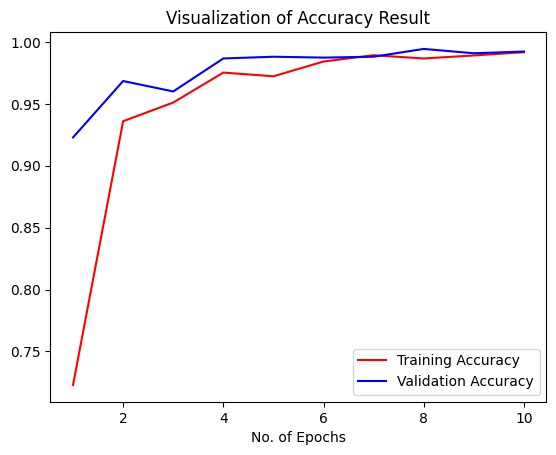

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1426 files belonging to 3 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1426/1426 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [40]:
predicted_categories

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 2, 0, ..., 2, 2, 2], dtype=int64)>

In [43]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 6.4 MB/s eta 0:00:02
   - -------------------------------------- 0.5/10.6 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.6 MB 10.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/10.6 MB 15.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.6 MB 15.5 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 17.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.6 MB 16.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.7/10.6 MB 17.3 MB/s eta 0:00:01
   

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [45]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.99      0.99       485
 Potato___Late_blight       0.98      1.00      0.99       485
     Potato___healthy       1.00      0.99      0.99       456

             accuracy                           0.99      1426
            macro avg       0.99      0.99      0.99      1426
         weighted avg       0.99      0.99      0.99      1426



### Confusion Matrix Visualization

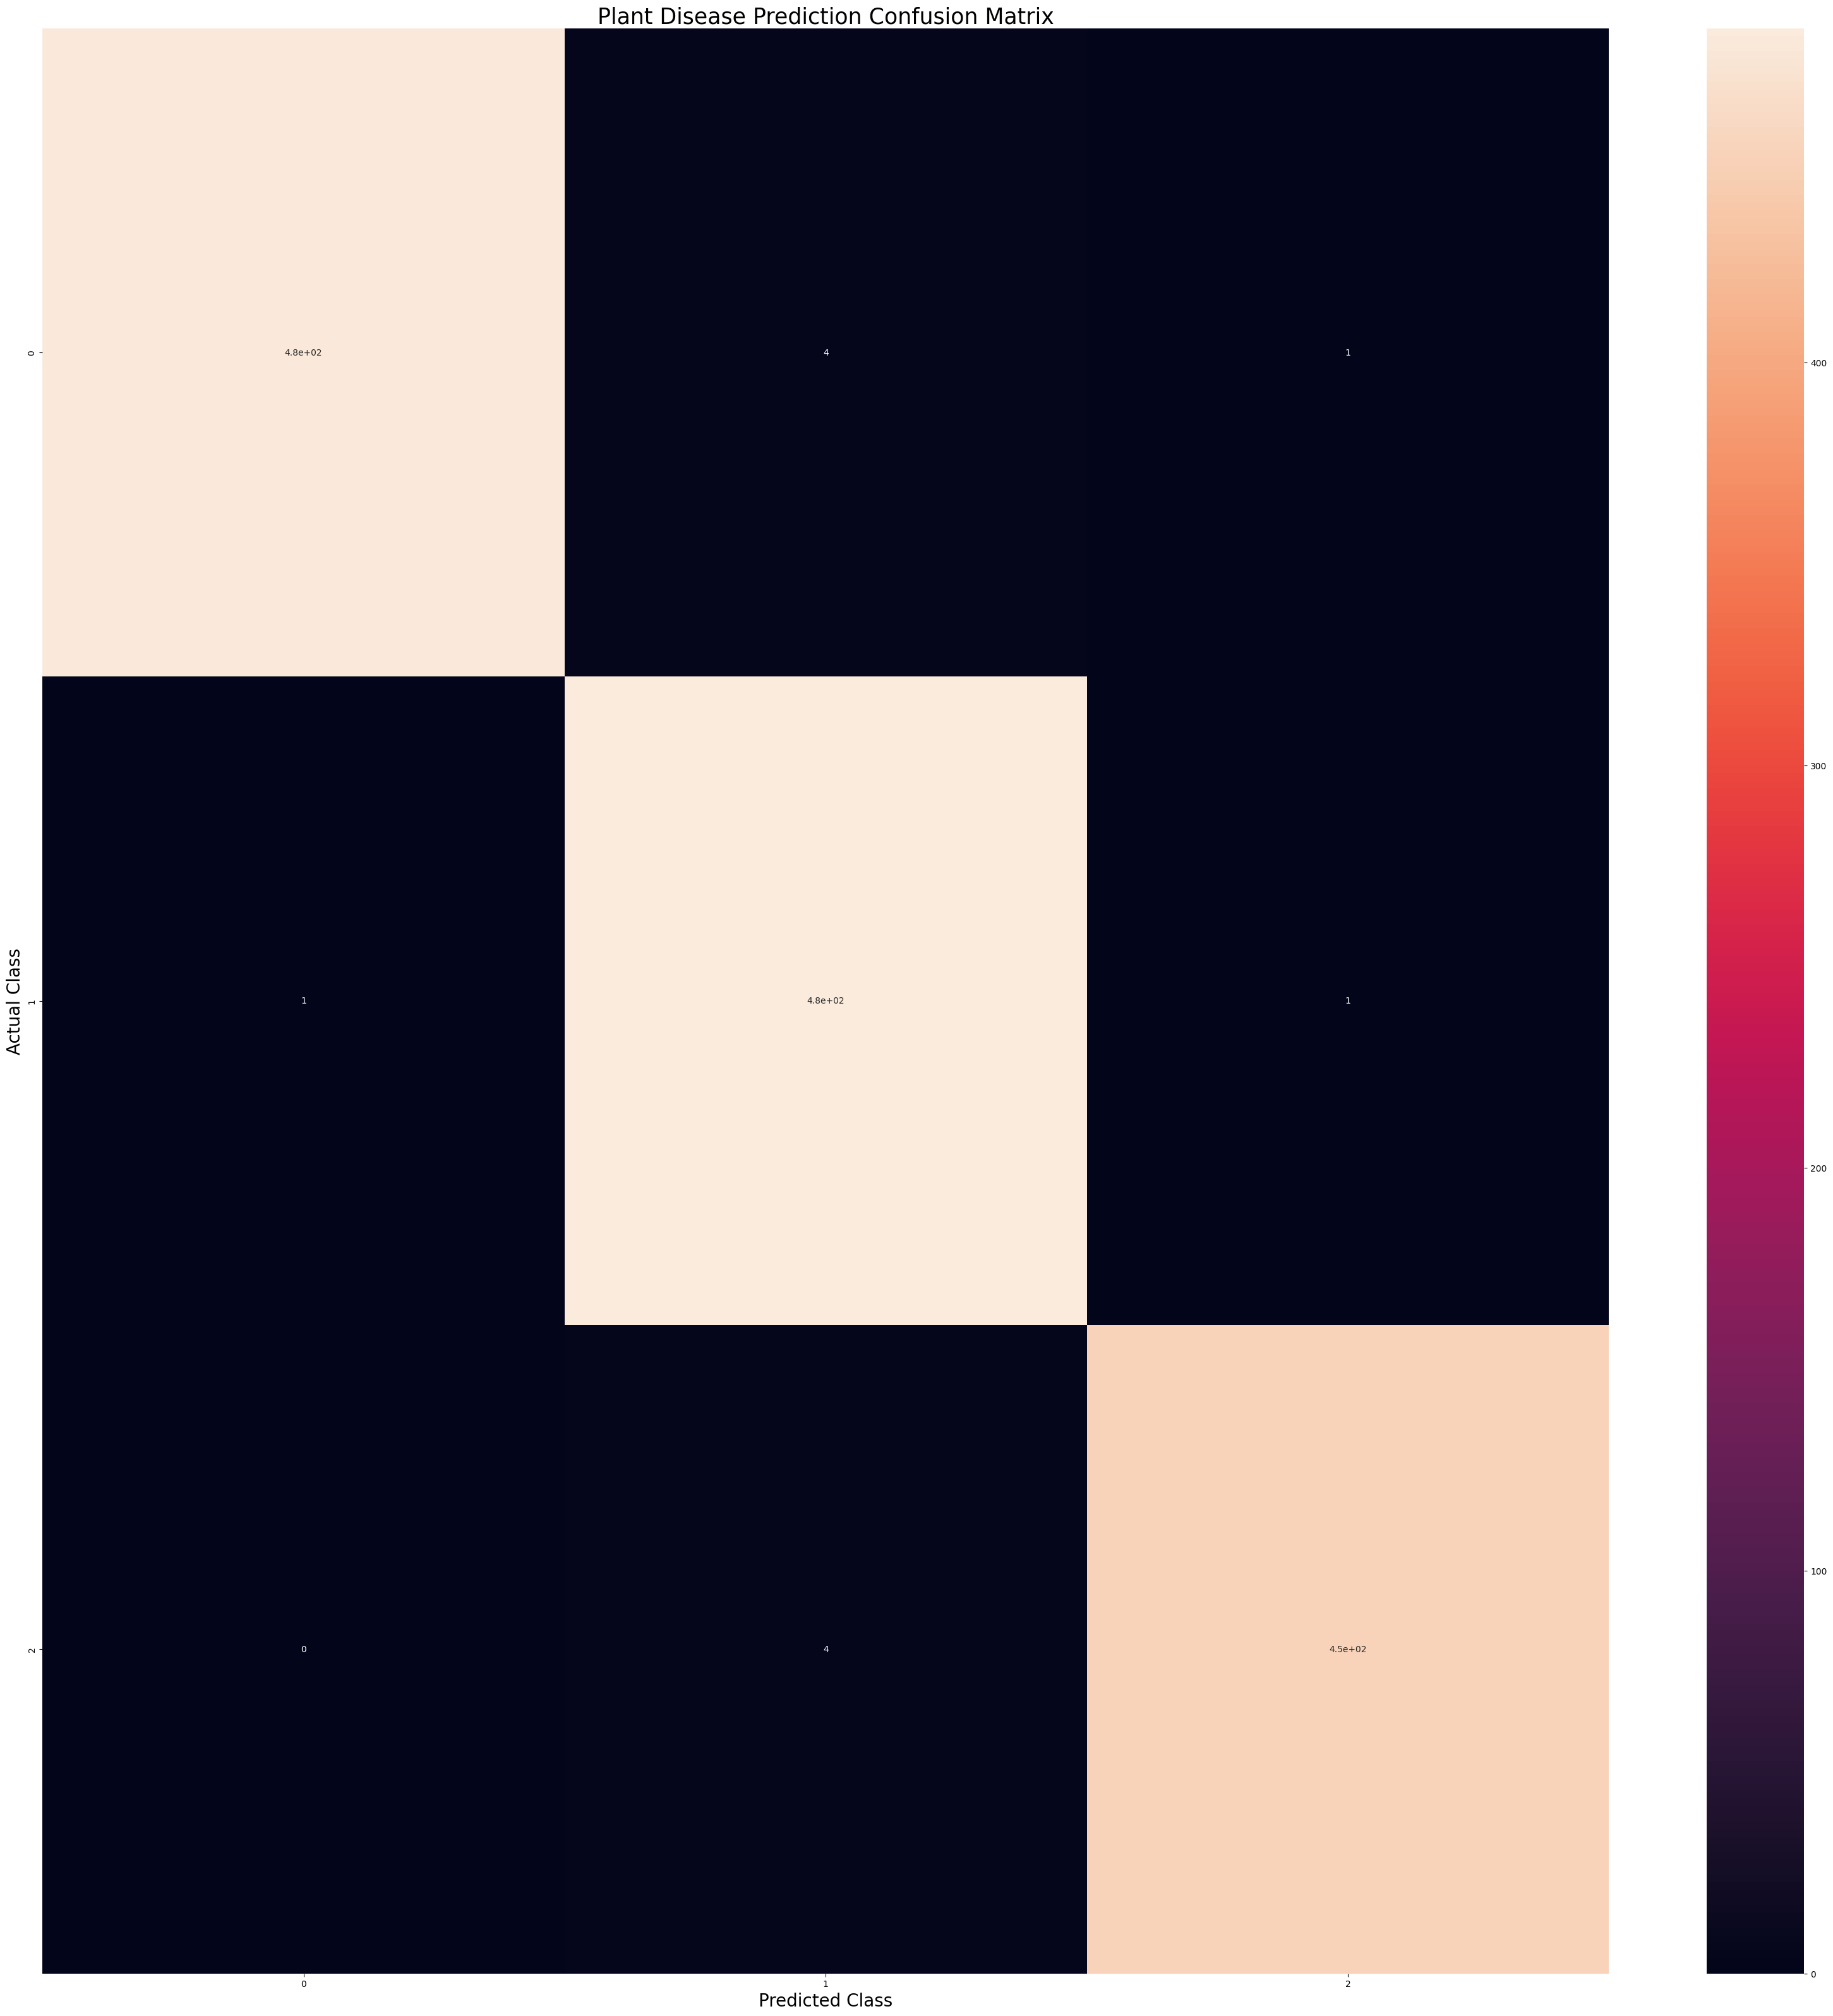

In [46]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()